# <font color='#f14e4e'> This dataset provides information about the telecommunication activity over the city of Milano ( Telecommunications - SMS, Call, Internet  )</font>


## <font color='blue'> Business Understanding :</font>

Call Detail Record [CDR] describes a specific instance of a telecommunication transaction that passes through a network element. Every time a user performs a telecom activity such as send/receive SMS and calls, a CDR is generated. It contains information about the caller/sender ID, location, time, data used, etc. Millions and millions of such records are generated and is mainly used for billing purposes. Analysis and modeling of this time series data helps to identify usage patterns over a period of time and across geographical grids. This helps in decision making of resource allocation by the telecommunication company.

The telecommunication dataset that we have contains information about the usage of SMS, CALL and Internet services in Milan, as well as internet usage. By analyzing this data, we can gain insights into how people use these services across different regions of the city. 

### Define the goal :

This information can be useful for network planning and optimization, as well as understanding customer behavior and preferences. Additionally, by examining patterns in usage over time, we may be able to identify trends and predict future usage patterns and to meet the needs of the customers, which can help inform decisions about network expansion, maintenance, and upgrades.


## <font color='blue'> Data Understanding :</font>

Telecom Italia organized the ‘Telecom Italia Big Data Challenge’ in 2014, they provided data of two Italian areas: the city of Milan . It is a rich, open multi-source aggregation of telecommunications, weather, news, social networks and electricity data. The data pertaining to the challenge have been released to the research teams under the Open Database License (ODbL) and is maintained by Harvard Dataverse.

* the dataset was collected over two months, from November 1st, 2013 to January 1st, 2014, and is geo-referenced to the city of Milan. 
* There are 62 files consisting of CDRs collected from Nov 1,2013 to Jan 1, 2014, one file for each day. 
* The area is composed of a grid overlay of 10,000 squares with size of about 235×235 meters. geojson file that provides the geographical reference of each square which composes the grid in the reference system: WGS 84—EPSG:4326 is downloaded from https://doi.org/10.7910/DVN/QJWLFU.

### The dataset contains the following variables:

* Square id: a unique identifier for a given square in the Milan grid.
* Time Interval: the start time of the interval in milliseconds. The end interval time can be obtained by adding 600,000 milliseconds (10 minutes) to this value.
* SMS-in activity: activity proportional to the amount of received SMS messages inside a given Square id during a given Time interval. The SMS messages are sent from the nation identified by the Country code.
* SMS-out activity: activity proportional to the amount of sent SMS messages inside a given Square id during a given Time interval. The SMS messages are received in the nation identified by the Country code.
* Call-in activity: activity proportional to the amount of received calls inside a given Square id during a given Time interval. The calls are issued from the nation identified by the Country code.
* Call-out activity: activity proportional to the amount of issued calls inside a given Square id during a given Time interval. The calls are received in the nation identified by the Country code.
* Internet traffic activity: the number of CDRs generated inside a given Square id during a given Time interval. The internet traffic is initiated from the nation identified by the Country code.
* Country code: the phone country code of the nation.


### <font color='red'> NB : The shared datasets were created combining all this anonymous information, with a temporal aggregation of time slots of ten minutes. The number of records in the datasets " S'i(t) " follows the rule: </font>
  * ### S'i(t)=Si(t)k
### <font color='red'> where k is a constant defined by Telecom Italia, which hides the true number of calls, SMS and connections.</font>

</br>

### what we are going to do  ?

the first step is to perform exploratory data analysis (EDA) on the telecommunications dataset. EDA involves examining the data to identify patterns, trends, and relationships that may exist in the data. This can be done using various statistical and visualization techniques.

Some potential steps for EDA of the telecommunications data could include:

   * 1) Checking for missing or invalid data: Look for any missing values or data that appears to be incorrect or out of range.
   * 2) Descriptive statistics: Compute summary statistics such as mean, median, and standard deviation for each variable to get         a better understanding of the data.
   * 3) Data visualization: Create various plots and charts to visualize the data and identify any patterns or trends.(For               example, scatterplots could be used to examine the relationship between callin and callout, while bar charts could be           used to compare the usage of different services (e.g. SMS vs. internet).)
   * 4) Segmentation analysis: Explore the data to identify any natural clusters or groups of customers based on their usage             patterns.(This could involve clustering algorithms or other segmentation techniques to group similar customers                   together.)
   * 5) Time series analysis: Examine trends and patterns in the data over time. This could involve plotting the data over time,         identifying seasonal trends, or using time series forecasting techniques to make predictions about future usage.

==> Overall, the goal of EDA is to gain a better understanding of the data and identify any interesting or important patterns that could inform network optimization, customer segmentation, or other planning and maintenance activities.



### and the questions is : 
   * 1) what is the structure of my data ?
   * 2) what is the different type of data that we have ? (converting data types if we have)
   * 3) which is the best way to handling missing values ? (removing duplicates, filling in missing values ...)
   * 4) if we don't have the real number of Call, SMS and internat, can i work with the one that we have or we should found the         constant K to determinate the true number  ?
   * 5) what represent the number of CDR that we have ?
   * 6) did we have some features correlated with each other ?
   * 7) what kind of Machine learning alghorithme that we need to use (classification , clustering ,forcasting, Regression ...)? 
   
</br>

### More information :

 * **Publication:  Scientific Data, Volume 2, id. 150055 (2015).**
 
 * **Pub Date: Telecom Italia,  October 2015**
 
 * **DOI: [10.1038/sdata.2015.55 ](https://www.nature.com/articles/sdata201555)**
 
 * **Data ( Telecommunications - SMS, Call, Internet - MI ) :  https://doi.org/10.7910/dvn/EGZHFV**

## <font color='blue'> Data Preparation :</font>

### after we prepared  the environnement ( python 3 , Jupyter notebook ) first of all that we need is to install the necessary packages like pandas , numpy ...

 * pandas can be installed via pip from PyPI  (pip install pandas) and the same whay for numpy and matplotlib ... 

In [1]:
import pandas as pd
import numpy as np 
from datetime import datetime as dt
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

### Create a DataFrame with data file names placed under directory  "01_11_2013---07_11_2013" with extension .txt

In [2]:
# glob  is used to return all file paths that match a specific pattern.
filespath = glob("C:\\Users\\a.abdallah\\Desktop\\Telecommuniction-Data\\01_11_2013---07_11_2013\\*.txt" )

#Set the column names for the data read
col_list = ['gridID', 'timeInterval', 'countryCode', 'smsIn', 'smsOut', 'callIn', 'callOut', 'internet']

#Initialize an empty dataframe
data = pd.DataFrame()
#Read file into Pandas DataFrame          
data = pd.concat((pd.read_csv(file, sep='\t',header=None, names=col_list, parse_dates=True) for file in filespath), ignore_index=True)

data

  

gridID   timeInterval  countryCode     smsIn    smsOut    callIn  \
0              1  1383260400000            0  0.081363       NaN       NaN   
1              1  1383260400000           39  0.141864  0.156787  0.160938   
2              1  1383261000000            0  0.136588       NaN       NaN   
3              1  1383261000000           33       NaN       NaN       NaN   
4              1  1383261000000           39  0.278452  0.119926  0.188777   
...          ...            ...          ...       ...       ...       ...   
37622893    9999  1383864000000           39  0.914131  1.428025  0.669794   
37622894    9999  1383864600000            0  0.092566       NaN       NaN   
37622895    9999  1383864600000          216  0.288963       NaN       NaN   
37622896    9999  1383864600000          221  0.171990       NaN       NaN   
37622897    9999  1383864600000           39  0.184105  0.144481  0.319243   

           callOut   internet  
0              NaN        NaN  
1         0.052275  11.028366  
2         0.027300        NaN  
3              NaN   0.026137  
4         0.133637  11.100963  
...            ...        ...  
37622893       NaN  17.813618  
37622894  0.088767        NaN  
37622895       NaN        NaN  
37622896  0.085995        NaN  
37622897  0.085995  21.650467  

[37622898 rows x 8 columns]

In [3]:
data.columns

Index(['gridID', 'timeInterval', 'countryCode', 'smsIn', 'smsOut', 'callIn',
       'callOut', 'internet'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37622898 entries, 0 to 37622897
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   gridID        int64  
 1   timeInterval  int64  
 2   countryCode   int64  
 3   smsIn         float64
 4   smsOut        float64
 5   callIn        float64
 6   callOut       float64
 7   internet      float64
dtypes: float64(5), int64(3)
memory usage: 2.2 GB


In [5]:
Missing_values_percentage= (data.isna().mean()*100)
Missing_values_percentage     

gridID           0.000000
timeInterval     0.000000
countryCode      0.000000
smsIn           46.425209
smsOut          69.053232
callIn          69.788789
callOut         57.277584
internet        50.002044
dtype: float64

In [6]:
data.describe()

gridID  timeInterval   countryCode         smsIn        smsOut  \
count  3.762290e+07  3.762290e+07  3.762290e+07  2.015639e+07  1.164307e+07   
mean   5.254895e+03  1.383583e+12  1.854582e+02  2.257395e+00  2.207828e+00   
std    2.748042e+03  1.733316e+08  2.904913e+03  5.927244e+00  5.592025e+00   
min    1.000000e+00  1.383260e+12  0.000000e+00  2.331498e-06  2.331498e-06   
25%    3.057000e+03  1.383429e+12  2.000000e+01  1.505390e-01  1.513033e-01   
50%    5.370000e+03  1.383589e+12  3.900000e+01  5.901342e-01  5.790800e-01   
75%    7.521000e+03  1.383735e+12  4.600000e+01  2.019160e+00  1.972325e+00   
max    1.000000e+04  1.383865e+12  9.725900e+04  6.320732e+02  5.944885e+02   

             callIn       callOut      internet  
count  1.136633e+07  1.607341e+07  1.881068e+07  
mean   2.656719e+00  2.154600e+00  3.655456e+01  
std    6.883280e+00  6.469558e+00  9.973139e+01  
min    2.331498e-06  2.331498e-06  2.331498e-06  
25%    1.157594e-01  7.400693e-02  8.754884e-02  
50%    5.521602e-01  3.118383e-01  3.874875e+00  
75%    2.335736e+00  1.511754e+00  3.315552e+01  
max    2.628877e+02  3.011467e+02  7.936265e+03

### Exploratory data analysis (EDA) on my dataset with pandas profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)

profile.to_file(output_file = "Discharge_profiling.html")
profile


### Convert timeInterval column which has Epoch timestamps to UTC and then convert to Milan's local timezone and save it to column startTime

* data ['timeInterval'] is a column in our DataFrame that contains epoch timestamps (the number of seconds or milliseconds since January 1, 1970). To convert these epoch timestamps to human-readable dates and times, we're using the pd.to_datetime() function from the pandas library.

* unit='ms' specifies that the epoch timestamps are in milliseconds (as opposed to seconds or some other unit of time).

* utc=True specifies that the epoch timestamps are in Coordinated Universal Time (UTC), which is a standard time zone used as a reference point around the world.

==> This will return a pandas Series of datetime objects in UTC timezone.

* The next step is to convert these UTC datetimes to the local timezone of Milan (Central European Time or CET). To do this, we can use the dt.tz_convert() method of the pandas Series to convert the timezone to CET.

* Finally, we want to remove the timezone information from the datetime objects, so that they are in local time format instead of "UTC+1:00" format. To do this, we can use the dt.tz_localize(None) method of the pandas Series.

==> This will convert the Series of datetimes to Milan's local timezone and remove the timezone information, so that the datetime objects are in the format YYYY-MM-DD HH:MM:SS. Finally, we can save this Series to a new column in our DataFrame called startTime.


In [3]:
#tz_localize(None) returns local time format instead of "UTC+1:00" format
data['startTime'] = pd.to_datetime(data.timeInterval, unit='ms', utc=True).dt.tz_convert('CET').dt.tz_localize(None)



# create new columns 
data['Date'] = data['startTime'].dt.date
#data['Time'] = data['startTime'].dt.time
data['hour'] = data['startTime'].dt.hour
data['Day_of_week'] = data['startTime'].dt.day_name()

#Drop timeInterval & startTime columns
data.drop(columns={'timeInterval' },inplace=True)
data.fillna(0,inplace=True)

data

gridID  countryCode     smsIn    smsOut    callIn   callOut  \
0              1            0  0.081363  0.000000  0.000000  0.000000   
1              1           39  0.141864  0.156787  0.160938  0.052275   
2              1            0  0.136588  0.000000  0.000000  0.027300   
3              1           33  0.000000  0.000000  0.000000  0.000000   
4              1           39  0.278452  0.119926  0.188777  0.133637   
...          ...          ...       ...       ...       ...       ...   
37622893    9999           39  0.914131  1.428025  0.669794  0.000000   
37622894    9999            0  0.092566  0.000000  0.000000  0.088767   
37622895    9999          216  0.288963  0.000000  0.000000  0.000000   
37622896    9999          221  0.171990  0.000000  0.000000  0.085995   
37622897    9999           39  0.184105  0.144481  0.319243  0.085995   

           internet           startTime        Date  hour Day_of_week  
0          0.000000 2013-11-01 00:00:00  2013-11-01     0      Friday  
1         11.028366 2013-11-01 00:00:00  2013-11-01     0      Friday  
2          0.000000 2013-11-01 00:10:00  2013-11-01     0      Friday  
3          0.026137 2013-11-01 00:10:00  2013-11-01     0      Friday  
4         11.100963 2013-11-01 00:10:00  2013-11-01     0      Friday  
...             ...                 ...         ...   ...         ...  
37622893  17.813618 2013-11-07 23:40:00  2013-11-07    23    Thursday  
37622894   0.000000 2013-11-07 23:50:00  2013-11-07    23    Thursday  
37622895   0.000000 2013-11-07 23:50:00  2013-11-07    23    Thursday  
37622896   0.000000 2013-11-07 23:50:00  2013-11-07    23    Thursday  
37622897  21.650467 2013-11-07 23:50:00  2013-11-07    23    Thursday  

[37622898 rows x 11 columns]

In [7]:
# The isnull() function is used to detect missing values for an array-like object and returns: bool or array-like of bool
#(Replace all values in the DataFrame with True for NULL values, otherwise False)
#we count the NaN values by using function sum()
data.isnull().sum()

gridID                 0
timeInterval           0
countryCode            0
smsIn           17466509
smsOut          25979827
callIn          26256565
callOut         21549487
internet        18812218
dtype: int64

In [4]:
# make a copy from data
data2 = data.copy()
data2

gridID  countryCode     smsIn    smsOut    callIn   callOut  \
0              1            0  0.081363  0.000000  0.000000  0.000000   
1              1           39  0.141864  0.156787  0.160938  0.052275   
2              1            0  0.136588  0.000000  0.000000  0.027300   
3              1           33  0.000000  0.000000  0.000000  0.000000   
4              1           39  0.278452  0.119926  0.188777  0.133637   
...          ...          ...       ...       ...       ...       ...   
37622893    9999           39  0.914131  1.428025  0.669794  0.000000   
37622894    9999            0  0.092566  0.000000  0.000000  0.088767   
37622895    9999          216  0.288963  0.000000  0.000000  0.000000   
37622896    9999          221  0.171990  0.000000  0.000000  0.085995   
37622897    9999           39  0.184105  0.144481  0.319243  0.085995   

           internet           startTime        Date  hour Day_of_week  
0          0.000000 2013-11-01 00:00:00  2013-11-01     0      Friday  
1         11.028366 2013-11-01 00:00:00  2013-11-01     0      Friday  
2          0.000000 2013-11-01 00:10:00  2013-11-01     0      Friday  
3          0.026137 2013-11-01 00:10:00  2013-11-01     0      Friday  
4         11.100963 2013-11-01 00:10:00  2013-11-01     0      Friday  
...             ...                 ...         ...   ...         ...  
37622893  17.813618 2013-11-07 23:40:00  2013-11-07    23    Thursday  
37622894   0.000000 2013-11-07 23:50:00  2013-11-07    23    Thursday  
37622895   0.000000 2013-11-07 23:50:00  2013-11-07    23    Thursday  
37622896   0.000000 2013-11-07 23:50:00  2013-11-07    23    Thursday  
37622897  21.650467 2013-11-07 23:50:00  2013-11-07    23    Thursday  

[37622898 rows x 11 columns]

### Generate the totals for SMS and CALL 


In [5]:

data2['SMS_Total'] = data2['smsIn'] + data2['smsOut']
data2['CALL_Total'] = data2['callIn'] + data2['callOut']

#Drop smsIn , smsOut , callIn and callOut columns
data2.drop(columns={'smsIn',"smsOut","callIn","callOut"},inplace=True)
data2

gridID  countryCode   internet           startTime        Date  \
0              1            0   0.000000 2013-11-01 00:00:00  2013-11-01   
1              1           39  11.028366 2013-11-01 00:00:00  2013-11-01   
2              1            0   0.000000 2013-11-01 00:10:00  2013-11-01   
3              1           33   0.026137 2013-11-01 00:10:00  2013-11-01   
4              1           39  11.100963 2013-11-01 00:10:00  2013-11-01   
...          ...          ...        ...                 ...         ...   
37622893    9999           39  17.813618 2013-11-07 23:40:00  2013-11-07   
37622894    9999            0   0.000000 2013-11-07 23:50:00  2013-11-07   
37622895    9999          216   0.000000 2013-11-07 23:50:00  2013-11-07   
37622896    9999          221   0.000000 2013-11-07 23:50:00  2013-11-07   
37622897    9999           39  21.650467 2013-11-07 23:50:00  2013-11-07   

          hour Day_of_week  SMS_Total  CALL_Total  
0            0      Friday   0.081363    0.000000  
1            0      Friday   0.298651    0.213213  
2            0      Friday   0.136588    0.027300  
3            0      Friday   0.000000    0.000000  
4            0      Friday   0.398378    0.322415  
...        ...         ...        ...         ...  
37622893    23    Thursday   2.342156    0.669794  
37622894    23    Thursday   0.092566    0.088767  
37622895    23    Thursday   0.288963    0.000000  
37622896    23    Thursday   0.171990    0.085995  
37622897    23    Thursday   0.328587    0.405238  

[37622898 rows x 9 columns]

### By using the function corr() w can see the correlation between the features with heatmap 

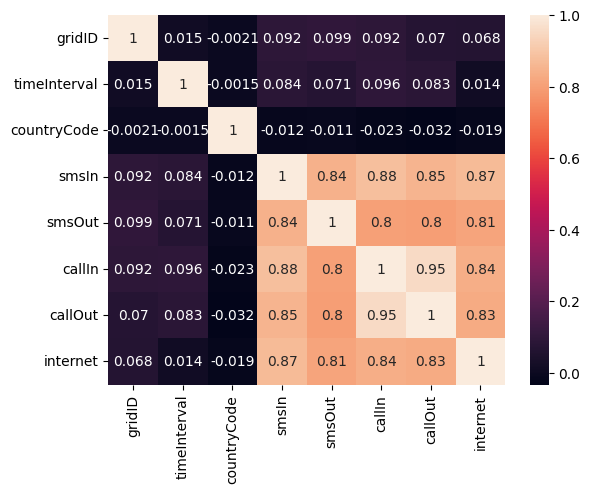

In [10]:
sns.heatmap(data.corr(),annot=True)
plt.show()

### check the correlation between different variable ( callOut, callIn, smsIn and smsOut )

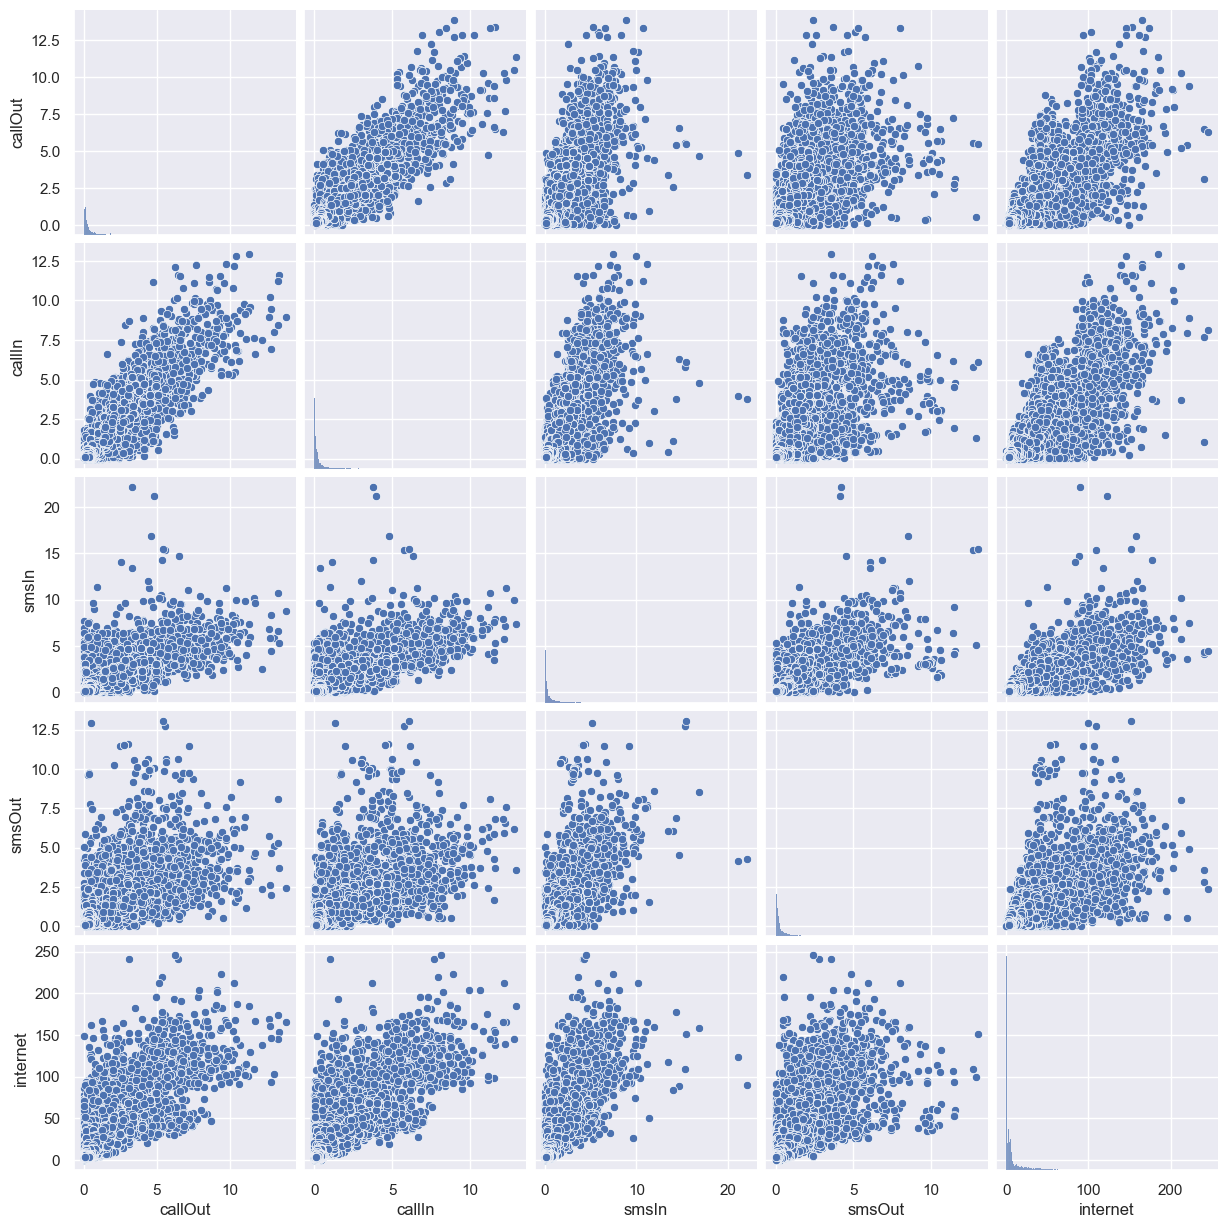

In [11]:
sns.set()
sns.pairplot(data[['callOut','callIn','smsIn','smsOut','internet']][:100000])


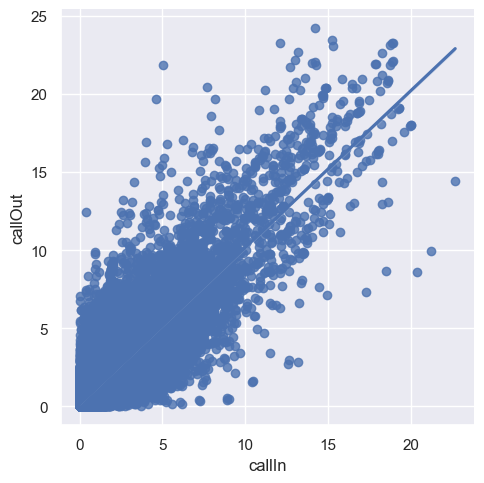

In [12]:
#sns.regplot(x=data['smsIn'],y=data['smsOut'])
sns.lmplot(x='callIn',y='callOut',data=data[:1000000])
plt.show()

### checking skewnesse

In [13]:
data['internet'].skew()

8.575435758716038

In [ ]:
sns.distplot(data['internet'])

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_16304\771456732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['internet'])


* ####  we can see with method skew() that number of internet trafic is highly sekwed , and by using histogram we can see it has a long right tail .

### to optisme our code we need to create a function called group_by and take 3 paramatres (the data , list of column that you want to groupe the data by it , collecttion contains the name of columns that you want to drop it) and  return a DataFrame  

In [6]:
#set an empty list
column =[]
# set an empty collection , in Python curly braces {} are used to define a dictionary data type,
# which is an unordered collection of key-value pairs. in this examples there is no key_value and no partcular order .
drop ={}
def group_by(data_name,column,drop):
    df = pd.DataFrame()
    
    #A groupby operation involves some combination of splitting the object, applying a function, and combining the results.
    df = data_name.groupby(column).sum()
    df.drop(columns=drop,inplace=True)
    return (df)
   
    

### Group the data by Day_of_week

In [7]:
group_Activity_by_day_of_week = group_by(data,['Day_of_week'],{'countryCode','gridID','hour'})
group_Activity_by_day_of_week

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_8156\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn        smsOut        callIn       callOut  \
Day_of_week                                                           
Friday       4.606387e+06  2.822430e+06  2.622800e+06  3.196762e+06   
Monday       7.742700e+06  4.288716e+06  5.409634e+06  6.166560e+06   
Saturday     4.750040e+06  2.805884e+06  2.835599e+06  3.413080e+06   
Sunday       4.378162e+06  2.782035e+06  2.285274e+06  2.806807e+06   
Thursday     8.144554e+06  4.286852e+06  5.648970e+06  6.231774e+06   
Tuesday      7.931791e+06  4.368527e+06  5.692466e+06  6.476255e+06   
Wednesday    7.947298e+06  4.351455e+06  5.702409e+06  6.340527e+06   

                 internet  
Day_of_week                
Friday       8.247925e+07  
Monday       1.081069e+08  
Saturday     8.099102e+07  
Sunday       8.350916e+07  
Thursday     1.103965e+08  
Tuesday      1.111241e+08  
Wednesday    1.110092e+08

### Group the data by Day

In [7]:
group_Activity_by_day = group_by(data,['Date'],{'countryCode','gridID','hour'})
group_Activity_by_day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn        smsOut        callIn       callOut  \
Date                                                                 
2013-11-01  4.606387e+06  2.822430e+06  2.622800e+06  3.196762e+06   
2013-11-02  4.750040e+06  2.805884e+06  2.835599e+06  3.413080e+06   
2013-11-03  4.378162e+06  2.782035e+06  2.285274e+06  2.806807e+06   
2013-11-04  7.742700e+06  4.288716e+06  5.409634e+06  6.166560e+06   
2013-11-05  7.931791e+06  4.368527e+06  5.692466e+06  6.476255e+06   
2013-11-06  7.947298e+06  4.351455e+06  5.702409e+06  6.340527e+06   
2013-11-07  8.144554e+06  4.286852e+06  5.648970e+06  6.231774e+06   

                internet  
Date                      
2013-11-01  8.247925e+07  
2013-11-02  8.099102e+07  
2013-11-03  8.350916e+07  
2013-11-04  1.081069e+08  
2013-11-05  1.111241e+08  
2013-11-06  1.110092e+08  
2013-11-07  1.103965e+08

In [8]:
group_ActivityToatal_by_day = group_by(data2,['Date'],{'countryCode','gridID','hour'})
group_ActivityToatal_by_day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


internet     SMS_Total    CALL_Total
Date                                                
2013-11-01  8.247925e+07  7.428817e+06  5.819562e+06
2013-11-02  8.099102e+07  7.555923e+06  6.248679e+06
2013-11-03  8.350916e+07  7.160196e+06  5.092081e+06
2013-11-04  1.081069e+08  1.203142e+07  1.157619e+07
2013-11-05  1.111241e+08  1.230032e+07  1.216872e+07
2013-11-06  1.110092e+08  1.229875e+07  1.204294e+07
2013-11-07  1.103965e+08  1.243141e+07  1.188074e+07

### plot of SMS_IN , SMS_OUT & Call_IN , CALL_OUT activities by day

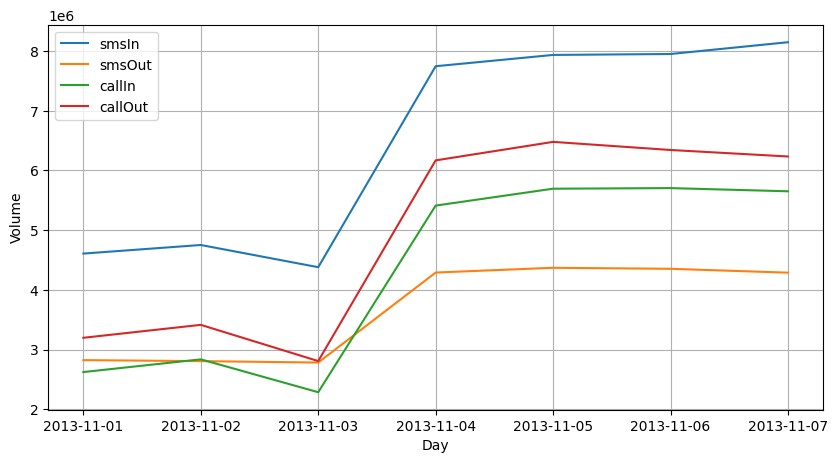

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

for column in group_Activity_by_day.columns[:-1]:
    group_Activity_by_day[column].plot(ax=ax, label=column)
    
ax.grid()
ax.set_xlabel("Day")
ax.set_ylabel("Volume")
ax.legend()
plt.show()





### Sort days by total volumes of SMS, Call & Internet activities

In [ ]:

#SMS_by_day = group_by_day[['SMS_Total']].sort_values(by = 'SMS_Total' , ascending = True)
#CALL_by_day = group_by_day[['CALL_Total']].sort_values(by = 'CALL_Total' , ascending = True)
#INTERNET_by_day = group_by_day[['internet']].sort_values(by = 'internet' , ascending = True)


### plot of SMS_Total , Call_Total & Internet activities by day using line chart

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\2140496817.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(group_ActivityToatal_by_day.index, rotation=75)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\2140496817.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(group_ActivityToatal_by_day.index, rotation=75)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\2140496817.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[idx].set_xticklabels(group_ActivityToatal_by_day.index, rotation=75)


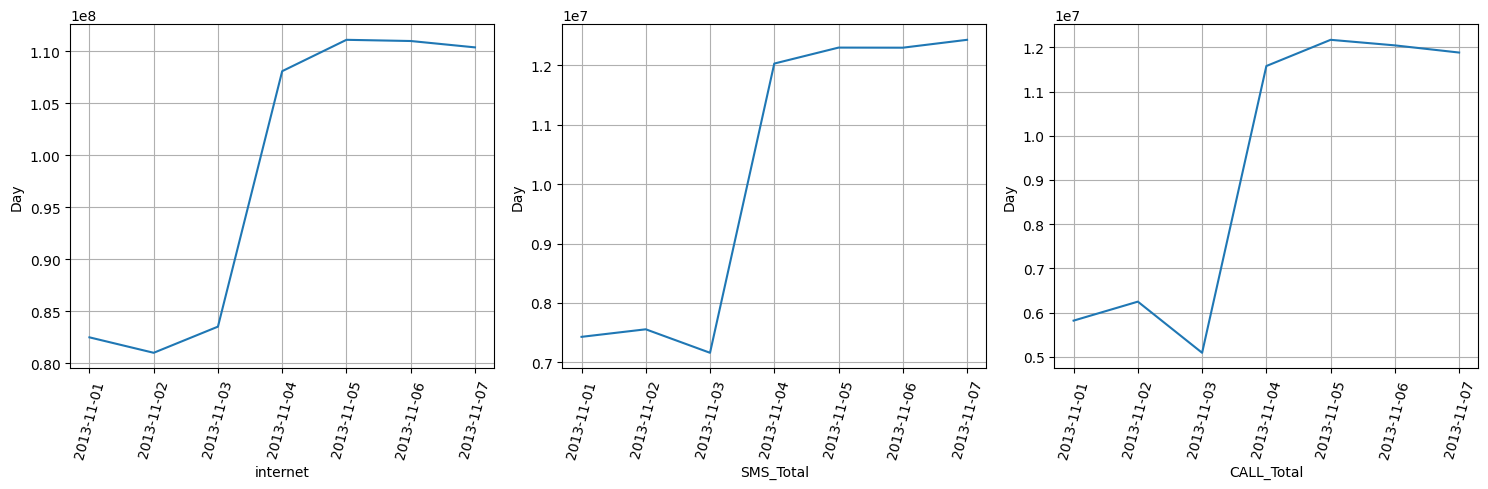

In [10]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# enumerate() is a built-in Python function that takes an iterable (a list, tuple, or any other sequence) 
# and returns an iterator that generates tuples containing both the index and the item at that index.

for idx,column in enumerate(group_ActivityToatal_by_day.columns):
    group_ActivityToatal_by_day[column].plot( ax=axs[idx])
    axs[idx].set_xlabel(column)
    axs[idx].set_ylabel("Day")
    axs[idx].set_xticklabels(group_ActivityToatal_by_day.index, rotation=75)
    axs[idx].grid()


plt.tight_layout()
plt.show()



### plot of SMS_IN , SMS_OUT & Call_IN , CALL_OUT activities by Hour using line chart

In [11]:
group_Activity_by_hour = group_by(data,['hour'],{'gridID','countryCode'})

#group_Activity_by_hour.reset_index(inplace=True)
group_Activity_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn        smsOut        callIn       callOut      internet
hour                                                                      
0     6.052820e+05  5.555044e+05  1.797632e+05  2.290948e+05  2.348885e+07
1     3.139912e+05  3.324220e+05  8.976319e+04  1.228706e+05  1.956353e+07
2     1.928273e+05  2.414595e+05  5.394730e+04  8.120553e+04  1.686377e+07
3     1.379072e+05  2.056120e+05  3.847290e+04  6.822410e+04  1.506482e+07
4     1.185341e+05  1.902678e+05  3.801372e+04  6.564112e+04  1.402213e+07
5     1.312604e+05  1.992546e+05  4.776854e+04  7.641638e+04  1.388156e+07
6     2.602220e+05  3.028265e+05  1.089364e+05  1.567041e+05  1.561721e+07
7     8.258802e+05  7.097681e+05  4.266653e+05  5.506025e+05  2.154565e+07
8     2.519444e+06  1.187291e+06  1.193614e+06  1.444437e+06  2.816011e+07
9     3.017389e+06  1.425104e+06  1.961353e+06  2.315310e+06  3.173844e+07
10    3.286858e+06  1.540176e+06  2.356296e+06  2.699008e+06  3.423502e+07
11    3.270455e+06  1.585673e+06  2.486863e+06  2.826284e+06  3.542375e+07
12    3.297779e+06  1.598983e+06  2.377119e+06  2.628803e+06  3.613459e+07
13    2.983466e+06  1.518480e+06  2.019454e+06  2.252925e+06  3.697848e+07
14    3.059572e+06  1.544606e+06  2.091309e+06  2.345092e+06  3.710610e+07
15    2.982199e+06  1.502806e+06  2.169175e+06  2.438447e+06  3.658708e+07
16    3.116738e+06  1.535691e+06  2.408171e+06  2.667082e+06  3.688228e+07
17    3.171019e+06  1.609120e+06  2.611018e+06  2.903617e+06  3.724554e+07
18    2.713023e+06  1.613628e+06  2.465498e+06  2.779116e+06  3.721812e+07
19    2.726279e+06  1.492270e+06  1.971066e+06  2.274260e+06  3.514090e+07
20    2.223781e+06  1.369932e+06  1.366900e+06  1.634817e+06  3.335435e+07
21    1.966012e+06  1.368891e+06  8.892958e+05  1.068141e+06  3.254402e+07
22    1.534946e+06  1.191784e+06  5.232268e+05  6.169510e+05  3.097173e+07
23    1.046064e+06  8.843505e+05  3.234613e+05  3.867159e+05  2.784801e+07

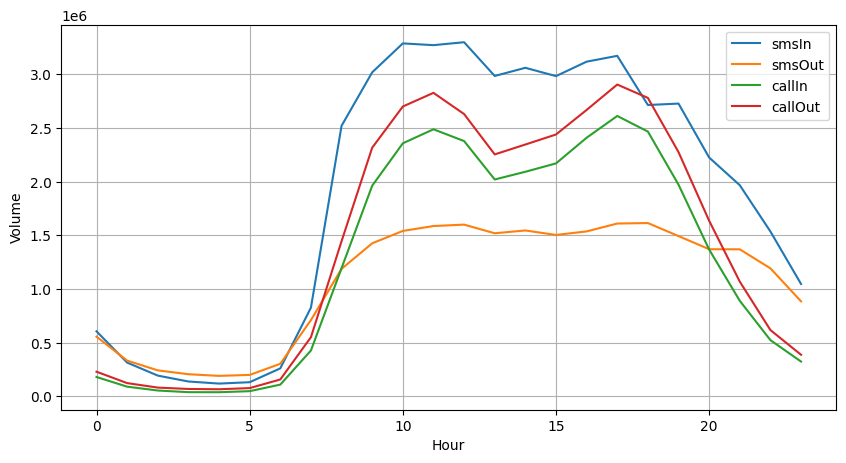

In [12]:
    fig, ax = plt.subplots(figsize=(10, 5))

    for column in group_Activity_by_hour.columns[:-1]:
        group_Activity_by_hour[column].plot(ax=ax, label=column)


    ax.grid()
    ax.set_xlabel("Hour")
    ax.set_ylabel("Volume")
    ax.legend()

    plt.show()
  

### Group the data by Hour

In [13]:

group_ActivityTotal_by_hour = pd.DataFrame()


group_ActivityTotal_by_hour = group_by(data2,['hour'],{'countryCode','gridID'})

group_ActivityTotal_by_hour 

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


internet     SMS_Total    CALL_Total
hour                                          
0     2.348885e+07  1.160786e+06  4.088581e+05
1     1.956353e+07  6.464133e+05  2.126338e+05
2     1.686377e+07  4.342868e+05  1.351528e+05
3     1.506482e+07  3.435192e+05  1.066970e+05
4     1.402213e+07  3.088019e+05  1.036548e+05
5     1.388156e+07  3.305150e+05  1.241849e+05
6     1.561721e+07  5.630484e+05  2.656405e+05
7     2.154565e+07  1.535648e+06  9.772678e+05
8     2.816011e+07  3.706735e+06  2.638051e+06
9     3.173844e+07  4.442493e+06  4.276663e+06
10    3.423502e+07  4.827035e+06  5.055303e+06
11    3.542375e+07  4.856129e+06  5.313147e+06
12    3.613459e+07  4.896763e+06  5.005922e+06
13    3.697848e+07  4.501946e+06  4.272378e+06
14    3.710610e+07  4.604177e+06  4.436402e+06
15    3.658708e+07  4.485005e+06  4.607623e+06
16    3.688228e+07  4.652429e+06  5.075253e+06
17    3.724554e+07  4.780139e+06  5.514635e+06
18    3.721812e+07  4.326651e+06  5.244614e+06
19    3.514090e+07  4.218549e+06  4.245326e+06
20    3.335435e+07  3.593713e+06  3.001717e+06
21    3.254402e+07  3.334903e+06  1.957437e+06
22    3.097173e+07  2.726730e+06  1.140178e+06
23    2.784801e+07  1.930415e+06  7.101772e+05

### plot the activity total by hour using bar chart

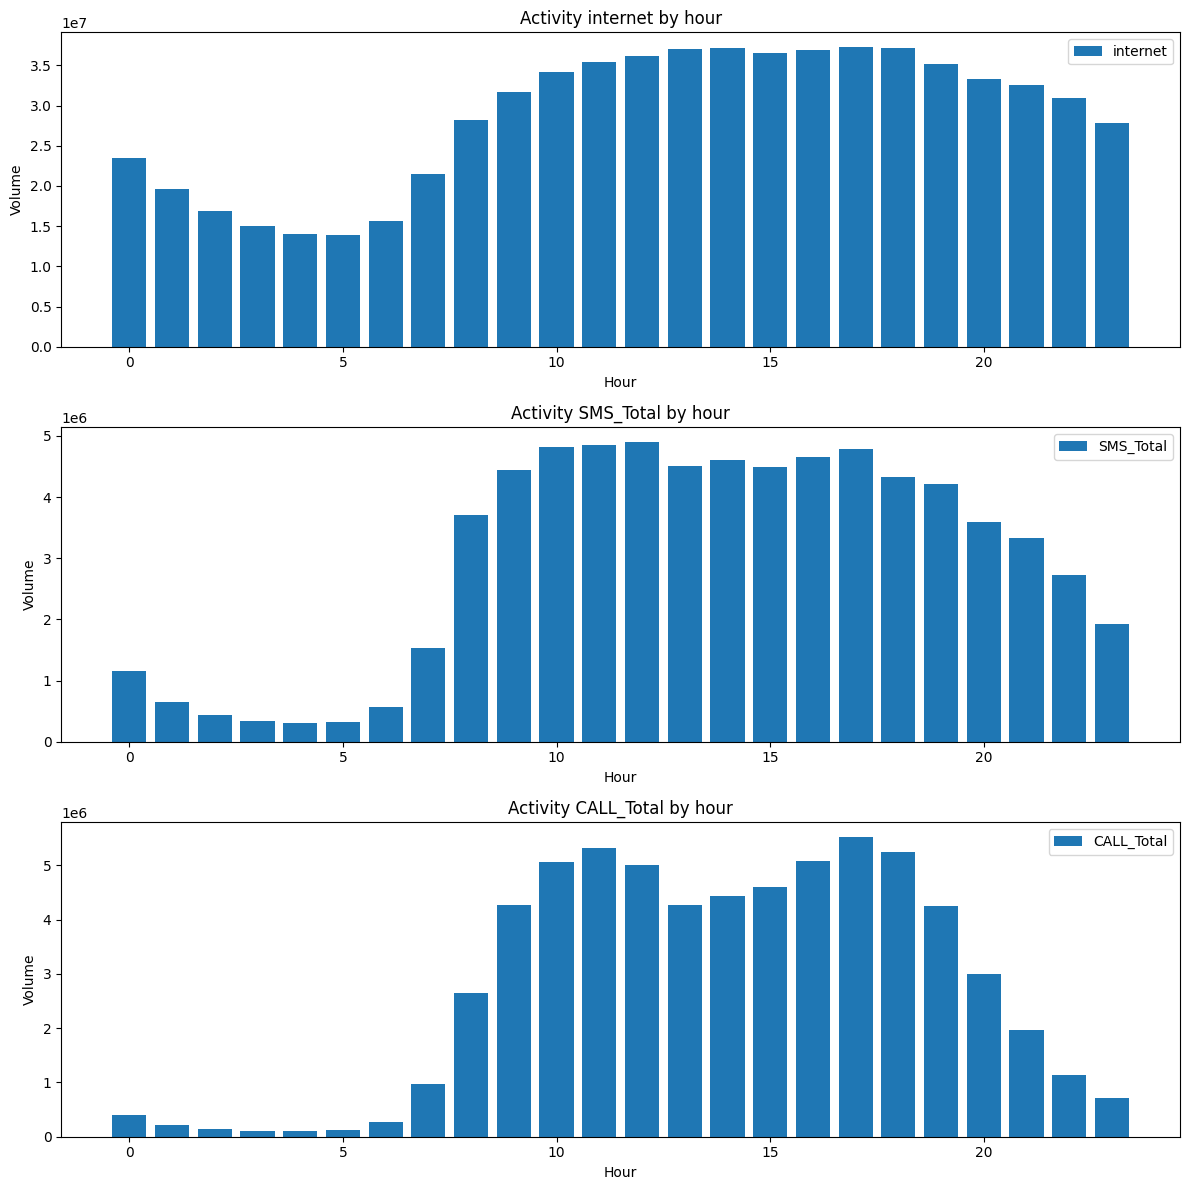

In [14]:



fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12, 12))

for idx,column in enumerate(group_ActivityTotal_by_hour.columns):

    axs[idx].bar(group_ActivityTotal_by_hour.index, group_ActivityTotal_by_hour[column], label=column)
    axs[idx].set_title("Activity " + column +" by hour")
    axs[idx].set_xlabel("Hour")
    axs[idx].set_ylabel("Volume")
    axs[idx].legend()
    


plt.tight_layout()
plt.show()


### group the activity by day and by hour

In [15]:
group_Activity_by_day_by_hour = group_by(data,['Date','hour'],{'countryCode','gridID'})
group_Activity_by_day_by_hour.reset_index(inplace=True)
group_Activity_by_day_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


Date  hour          smsIn         smsOut         callIn  \
0    2013-11-01     0  122133.937438   99854.500391   46430.908863   
1    2013-11-01     1   78865.249034   72349.680802   26904.141956   
2    2013-11-01     2   56241.202155   53626.620764   18588.392375   
3    2013-11-01     3   42279.171870   46501.954632   13227.274446   
4    2013-11-01     4   30291.692765   38776.742872   10220.831944   
..          ...   ...            ...            ...            ...   
163  2013-11-07    19  470057.404683  245385.649189  355738.668325   
164  2013-11-07    20  373900.573214  220579.500957  240698.981536   
165  2013-11-07    21  328942.903664  217627.630527  150259.503300   
166  2013-11-07    22  233627.218168  184462.187496   84420.561715   
167  2013-11-07    23  156280.778309  128245.292077   49062.254628   

           callOut      internet  
0     54806.248315  3.623713e+06  
1     34178.043675  3.087452e+06  
2     24601.607427  2.668823e+06  
3     20151.556831  2.366074e+06  
4     16239.305141  2.158129e+06  
..             ...           ...  
163  399899.535646  5.556072e+06  
164  278313.992112  5.151144e+06  
165  176615.453562  4.924813e+06  
166   96245.431150  4.622740e+06  
167   57190.127564  4.159924e+06  

[168 rows x 7 columns]

### plot the activity for each day by hour using heatmap

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1487824538.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_Activity_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1487824538.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_Activity_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1487824538.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_Activity_by_day_by_hour.pivot('Date', 'hour', activity)
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1487824538.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_table = group_Activity_by_day_by_hour.pivot('Date', 'hour', activi

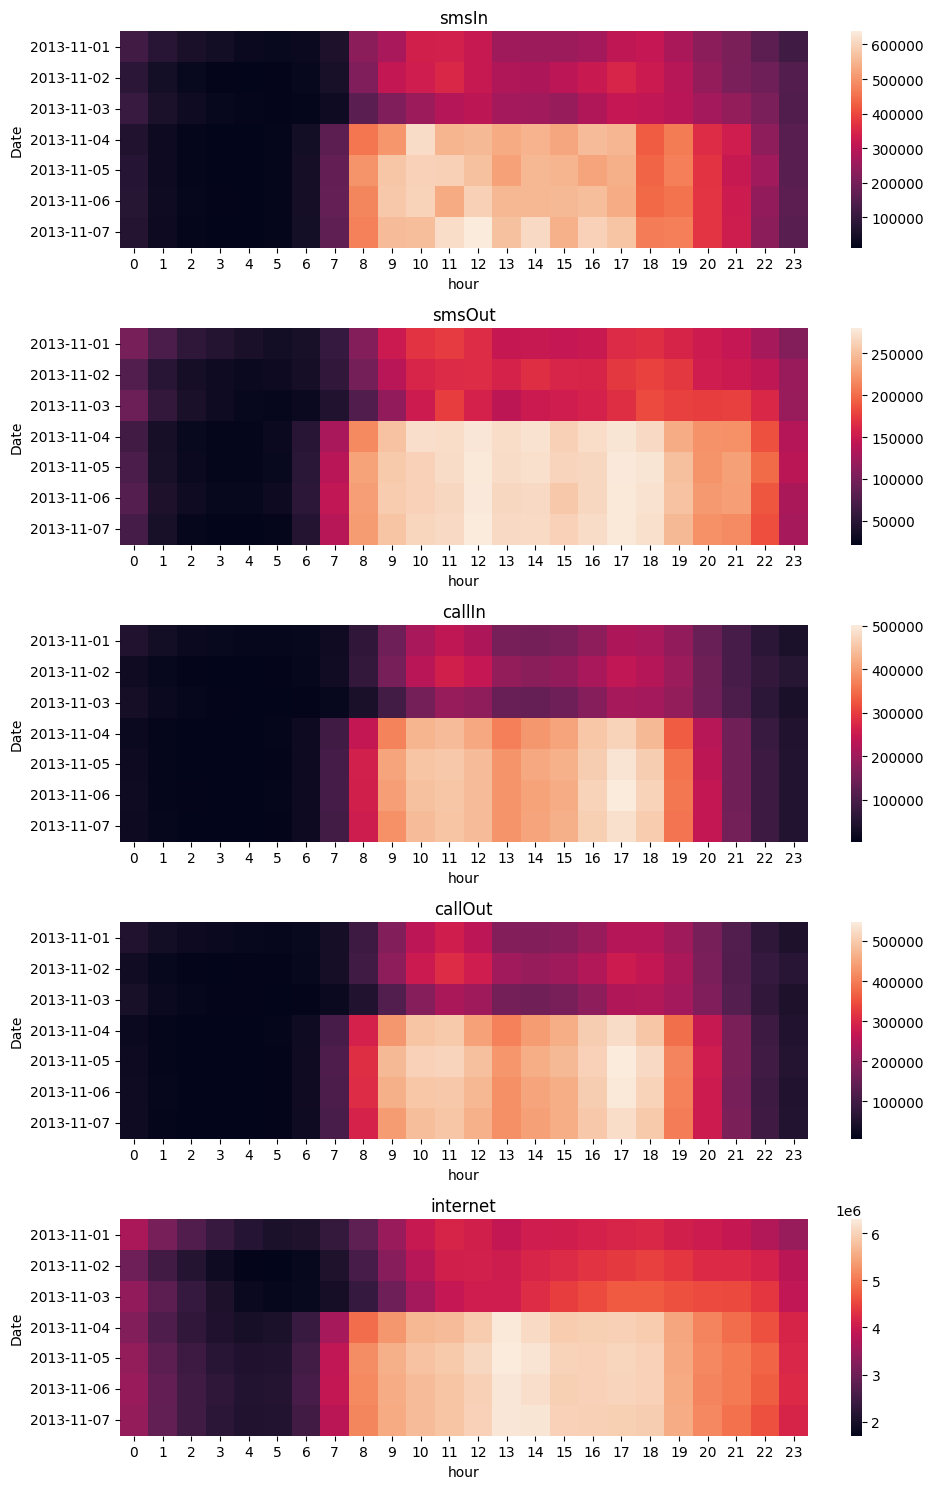

In [16]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Loop over activities and plot data for each activity
for idx, activity in enumerate(['smsIn', 'smsOut', 'callIn', 'callOut', 'internet']): # group_Activity_by_day_by_hour
    
    
    
    

    # Create pivot table and plot heatmap
    pivot_table = group_Activity_by_day_by_hour.pivot('Date', 'hour', activity)
    sns.heatmap(pivot_table, ax=ax[idx])

    # Set title for subplot
    ax[idx].set_title(activity)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
# Show plot
plt.show()


In [17]:

group_ActivityTotal_by_grid = group_by(data2,['gridID'],{'countryCode','hour'})

group_ActivityTotal_by_grid 


C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


internet    SMS_Total   CALL_Total
gridID                                        
1       10161.346877   972.462400   823.050729
2       10206.621484   986.751514   835.800917
3       10254.814512  1001.961711   849.372988
4       10030.208162   931.073724   786.119580
5        9155.531808   867.856045   735.981329
...              ...          ...          ...
9996    37581.639821  3183.956405  3024.765487
9997    41170.661609  3441.599035  3288.669089
9998    40483.931843  3383.343540  3230.625098
9999    25507.146794  2373.544933  2293.019995
10000   20478.927745  2213.046461  2164.498141

[10000 rows x 3 columns]

In [18]:
data_grid=group_ActivityTotal_by_grid[['SMS_Total','CALL_Total']].sort_values(by = 'SMS_Total' , ascending = False)

data_grid

SMS_Total     CALL_Total
gridID                              
5059    188800.334442  163262.384389
5161    154553.655954  120522.068039
6064    142061.943190  135993.525222
5061    138377.177504  105578.459040
5159    130823.665091  119592.578889
...               ...            ...
1207        65.220136      52.071944
112         61.556434      54.780694
2801        24.376618      24.827522
5239         0.000000    4255.699861
5339         0.000000    4480.264939

[10000 rows x 2 columns]

### Plot top 10 grids and its volume for SMS and CALL activity total and comparison between them

<AxesSubplot: xlabel='gridID'>

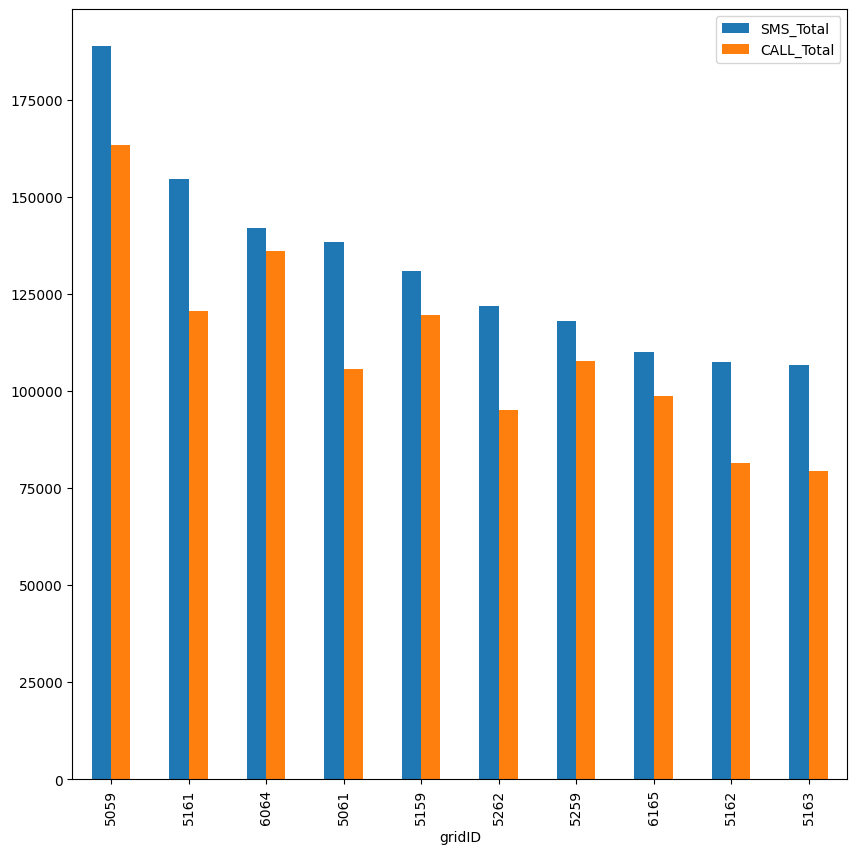

In [19]:

data_grid[:10].plot(kind="bar" , figsize=(10,10))


### Plot top 10 grids and its volume for Internet activity

Text(0, 0.5, ' gridId')

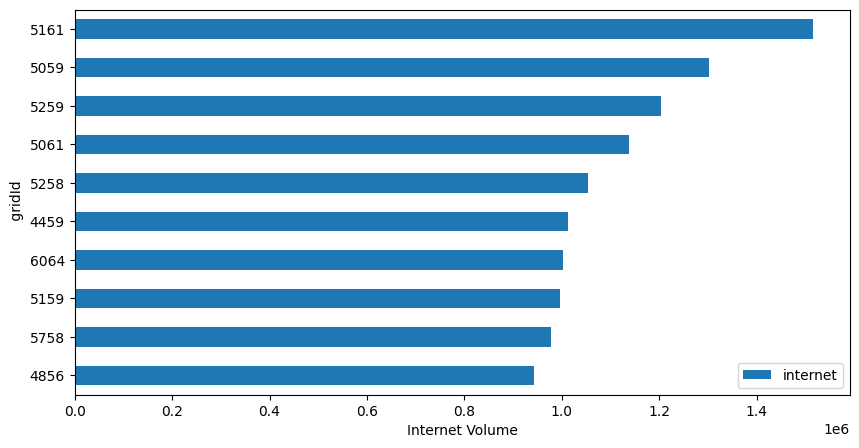

In [20]:

#Create new dataFrame name data grid contains only the total sms and call for each grid
Internet_activity_by_grid =  group_ActivityTotal_by_grid[['internet']].sort_values(by = 'internet' , ascending = False)

ax =Internet_activity_by_grid[:10].plot(kind='barh', figsize=(10,5))
ax.invert_yaxis()
ax.set_xlabel("Internet Volume")
ax.set_ylabel(" gridId")


### Group the activity total by gridID and Day


In [21]:
group_ActiviyTotal_by_grid_by_day = group_by(data2,['gridID','Date'],{'countryCode','hour'})


group_ActiviyTotal_by_grid_by_day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


internet   SMS_Total  CALL_Total
gridID Date                                           
1      2013-11-01  1507.048349  124.596325   89.353945
       2013-11-02  1515.641856  130.291756  101.481653
       2013-11-03  1533.148425  123.175072   77.051861
       2013-11-04  1404.813593  159.614824  138.297882
       2013-11-05  1518.090111  144.032134  139.501434
...                        ...         ...         ...
10000  2013-11-03  2716.099257  268.427403  190.423018
       2013-11-04  3069.209086  354.254727  383.135633
       2013-11-05  2881.612204  359.679285  384.331729
       2013-11-06  2971.410253  361.879012  393.260134
       2013-11-07  3035.727638  324.793118  357.358754

[70000 rows x 3 columns]

### Group the activity  by gridID and Day

In [22]:
group_Activiy_by_grid_by_day = group_by(data,['gridID','Date'],{'countryCode','hour'})

group_Activiy_by_grid_by_day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn      smsOut      callIn     callOut     internet
gridID Date                                                                   
1      2013-11-01   78.709755   45.886570   41.108567   48.245378  1507.048349
       2013-11-02   86.415810   43.875946   47.891016   53.590637  1515.641856
       2013-11-03   77.728292   45.446780   36.145436   40.906425  1533.148425
       2013-11-04  104.793806   54.821018   67.898464   70.399418  1404.813593
       2013-11-05   97.425105   46.607029   68.735213   70.766221  1518.090111
...                       ...         ...         ...         ...          ...
10000  2013-11-03  151.314860  117.112544   88.162068  102.260950  2716.099257
       2013-11-04  237.305787  116.948939  188.550832  194.584801  3069.209086
       2013-11-05  217.906827  141.772458  179.591614  204.740115  2881.612204
       2013-11-06  212.373992  149.505020  189.152721  204.107412  2971.410253
       2013-11-07  222.335642  102.457476  173.211759  184.146995  3035.727638

[70000 rows x 5 columns]

In [23]:
group_Activiy_by_grid_by_hour = group_by(data,['gridID','hour'],{'countryCode'})

group_Activiy_by_grid_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn     smsOut     callIn    callOut     internet
gridID hour                                                         
1      0     10.385189   7.477040   1.879054   2.182518   373.890267
       1      8.168210   6.298813   0.574191   0.515391   314.858006
       2      4.065845   3.244873   0.201288   0.198338   278.052830
       3      2.503390   1.719194   0.136588   0.220277   236.012492
       4      2.176409   1.615268   0.112862   0.084313   219.483874
...                ...        ...        ...        ...          ...
10000  19    91.201182  49.122058  68.825546  75.686769  1004.597208
       20    80.812011  51.411066  54.248321  57.844488  1011.144572
       21    57.398471  46.110873  31.522683  34.073760   932.732964
       22    38.400195  39.147609  16.424910  17.770865   777.680140
       23    28.766485  28.338961   9.904620   8.918746   843.170556

[240000 rows x 5 columns]

### groupe the activity by gridId

In [24]:
group_Activity_by_grid = group_by(data,['gridID'],{'countryCode','hour'})

group_Activity_by_grid

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn       smsOut       callIn      callOut      internet
gridID                                                                  
1        639.261690   333.200710   398.110222   424.940507  10161.346877
2        649.052684   337.698831   404.025526   431.775391  10206.621484
3        659.474809   342.486902   410.322132   439.050855  10254.814512
4        610.901901   320.171823   380.976439   405.143141  10030.208162
5        569.583077   298.272968   356.464539   379.516790   9155.531808
...             ...          ...          ...          ...           ...
9996    2068.397167  1115.559238  1425.650976  1599.114511  37581.639821
9997    2272.280097  1169.318937  1542.878171  1745.790918  41170.661609
9998    2227.572293  1155.771247  1517.018822  1713.606276  40483.931843
9999    1503.258386   870.286547  1089.763279  1203.256716  25507.146794
10000   1359.057968   853.988493  1034.523470  1129.974671  20478.927745

[10000 rows x 5 columns]

### Sorted the grid and display them

In [25]:

smsIn = group_Activity_by_grid[['smsIn']].sort_values(by = 'smsIn' , ascending = False)
smsOut = group_Activity_by_grid[['smsOut']].sort_values(by = 'smsOut' , ascending = False)
callIn = group_Activity_by_grid[['callIn']].sort_values(by = 'callIn' , ascending = False)
callOut = group_Activity_by_grid[['callOut']].sort_values(by = 'callOut' , ascending = False)
internet = group_Activity_by_grid[['internet']].sort_values(by = 'internet' , ascending = False)



smsIn

smsIn
gridID               
5059    127028.614843
5161    111475.820422
6064    100563.749045
5061     93629.587055
5159     87638.044994
...               ...
1207        41.446876
112         40.494094
2801        16.531998
5239         0.000000
5339         0.000000

[10000 rows x 1 columns]

### take a top 10 grid for each activity

In [26]:
top10_grid_Activity =pd.DataFrame()
top10_grid_Activity['smsIn'] = smsIn[:10].index.values
top10_grid_Activity['smsOut'] = smsOut[:10].index.values
top10_grid_Activity['callIn'] = callIn[:10].index.values
top10_grid_Activity['callOut'] = callOut[:10].index.values
top10_grid_Activity['internet'] = internet[:10].index.values
top10_grid_Activity

smsIn  smsOut  callIn  callOut  internet
0   5059    5059    5059     5059      5161
1   5161    4874    6064     6064      5059
2   6064    5061    5159     5161      5259
3   5061    5349    5161     5159      5061
4   5159    4972    5259     6072      5258
5   5262    5159    5061     6165      4459
6   5259    5161    6072     5061      6064
7   6165    5259    5258     5259      5159
8   5162    5262    5262     6058      5758
9   6058    6064    6058     5262      4856

### plot the activity for each activity (smsin,smsout,callin,callout) for the top 10 grid on each day

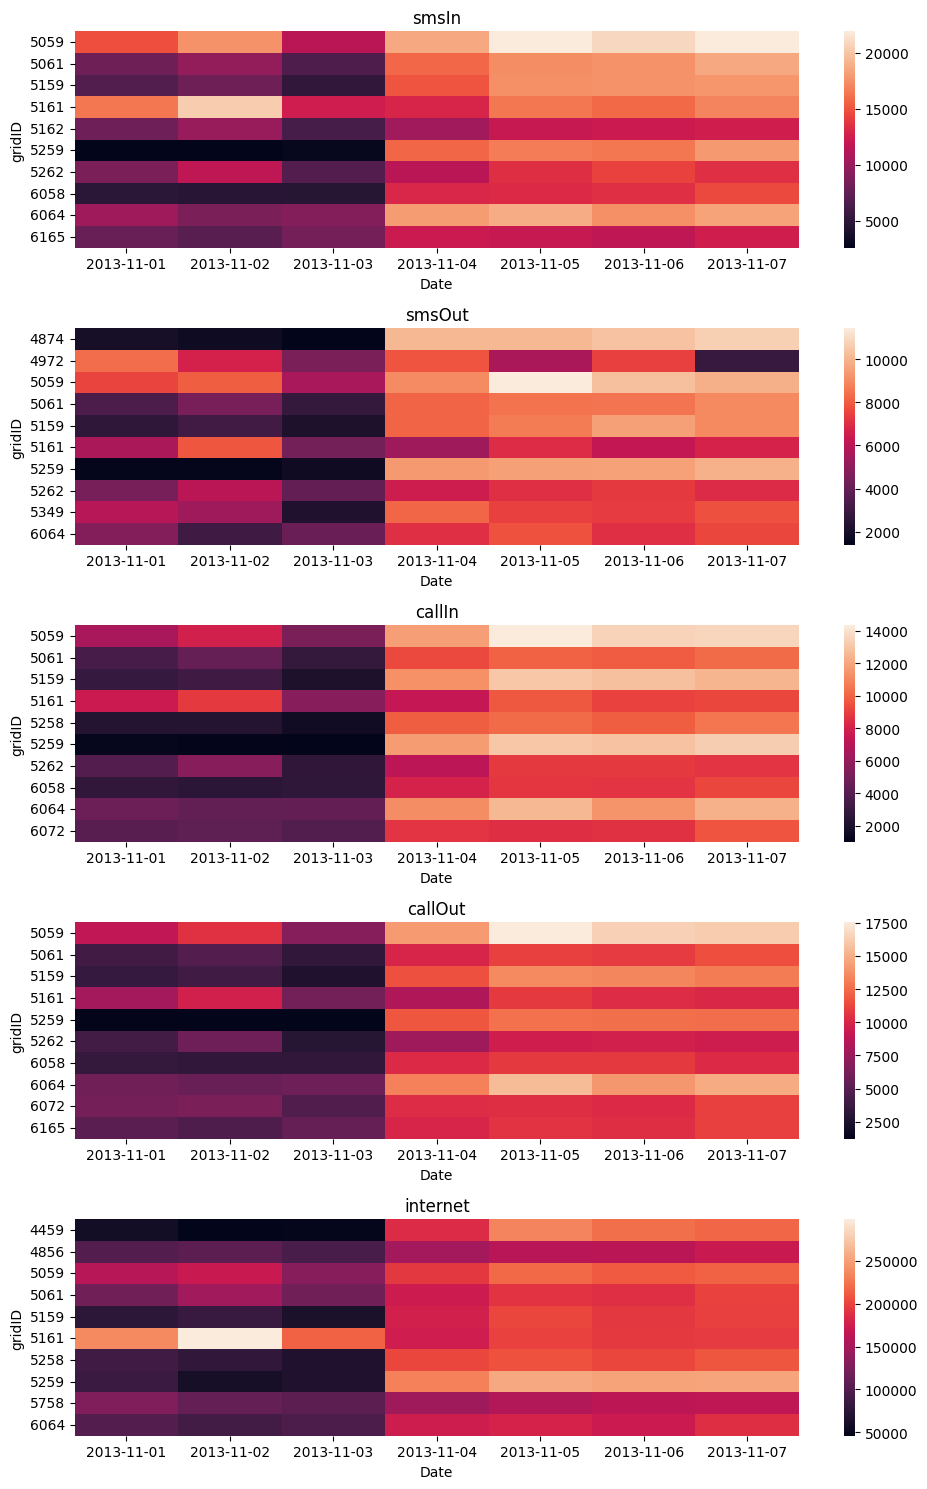

In [27]:
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(10, 15))

# Loop over activities and plot data for each activity
for idx, activity in enumerate(['smsIn', 'smsOut', 'callIn', 'callOut', 'internet']): # group_by_grid_by_day2
    
    # Get top 10 grid cells for specific activity
    top10 = top10_grid_Activity[activity]
    
    # Get data for specific activity and top 10 grid cells
    activity_data = group_Activiy_by_grid_by_day.loc[top10][[activity]]
    activity_data.reset_index(inplace=True)

    # Create pivot table and plot heatmap
    pivot_table = activity_data.pivot(index='gridID', columns='Date', values=activity)
    sns.heatmap(pivot_table, ax=ax[idx])

    # Set title for subplot
    ax[idx].set_title(activity)

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.tight_layout()
# Show plot
plt.show()

In [28]:
daily_5059 = group_Activiy_by_grid_by_day.loc[5059]
daily_5161 = group_Activiy_by_grid_by_day.loc[5161]
daily_6064 = group_Activiy_by_grid_by_day.loc[6064]
daily_5061 = group_Activiy_by_grid_by_day.loc[5061]
daily_5159 = group_Activiy_by_grid_by_day.loc[5159]
daily_5262 = group_Activiy_by_grid_by_day.loc[5262]
daily_5259 = group_Activiy_by_grid_by_day.loc[5259]
daily_6165 = group_Activiy_by_grid_by_day.loc[6165]
daily_5162 = group_Activiy_by_grid_by_day.loc[5162]
daily_6058 = group_Activiy_by_grid_by_day.loc[6058]

daily_5059


smsIn        smsOut        callIn       callOut  \
Date                                                                 
2013-11-01  14765.054951   7531.882896   6548.246306   8974.389176   
2013-11-02  17557.835952   8026.520467   7991.150685  10490.119791   
2013-11-03  11473.897518   5564.721542   5227.631586   6705.663954   
2013-11-04  18556.276819   9027.881744  11702.882936  14175.549409   
2013-11-05  21902.910383  11436.015806  14326.287495  17533.632569   
2013-11-06  20871.448624  10293.309739  13445.559528  16380.434500   
2013-11-07  21901.190596   9891.387403  13575.181753  16185.654700   

                 internet  
Date                       
2013-11-01  160148.770176  
2013-11-02  170721.094048  
2013-11-03  132476.995129  
2013-11-04  193314.641019  
2013-11-05  219327.837485  
2013-11-06  211122.321554  
2013-11-07  214776.074607

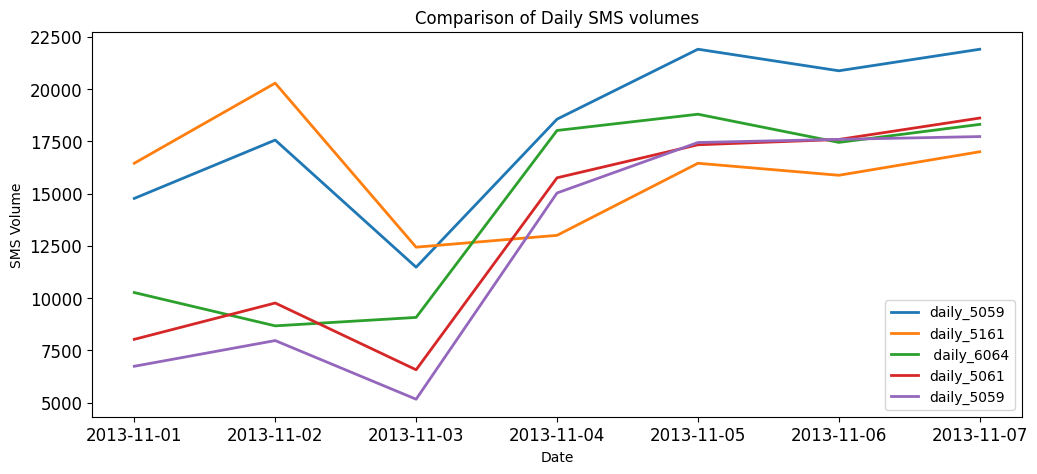

In [29]:
plt.figure(figsize=(25,10))
ax = daily_5059.smsIn.plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'daily_5059', legend='True')
ax =  daily_5161.smsIn.plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'daily_5161', legend='True')
ax = daily_6064.smsIn.plot(figsize=(12, 5), fontsize=12, linewidth=2, label = ' daily_6064', legend='True')
ax = daily_5061.smsIn.plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'daily_5061', legend='True')
ax = daily_5159.smsIn.plot(figsize=(12, 5), fontsize=12, linewidth=2, label = 'daily_5059', legend='True')


plt.xlabel('Date')
plt.ylabel('SMS Volume')
plt.title('Comparison of Daily SMS volumes')
plt.show()

### get the volums of sms , call and internet for the gridID = 5059

In [30]:

data_5161_Activity_hour = group_Activiy_by_grid_by_hour.loc[5161][['smsIn','smsOut','callIn','callOut']]


data_5161_Activity_hour

smsIn       smsOut       callIn      callOut
hour                                                     
0       380.626126   158.520654   123.717528   182.314335
1       174.059626    99.551303    73.319357    75.656208
2       108.927369    46.530223    41.315626    37.618009
3       110.738535    50.622584    33.028093    32.355589
4       111.140815    89.412189    40.403820    24.302951
5       206.343047    93.821535    49.307473    45.120208
6       362.976339   160.973044    85.285350    99.033153
7       654.693375   284.997165   240.526051   339.323378
8      1986.623141   919.537290   894.852679  1112.252330
9      3828.604960  1568.096910  2052.916679  2170.288369
10     5708.456965  2058.905623  3086.604682  3351.387161
11     7898.247025  3356.424098  4335.378485  4830.419868
12     9422.138330  3501.295677  5582.672397  5709.267196
13    10387.660461  4049.144851  5300.734735  5969.807002
14    10522.862693  4445.526926  4776.904619  5671.141797
15    10861.111413  3944.436417  5304.330972  5578.807812
16    11367.941241  4289.517154  5908.362231  5886.430718
17    10914.676741  3406.564022  6202.574793  6544.235076
18     9332.796783  3339.545645  5615.849395  5862.972411
19     7618.818487  2845.107865  4216.923482  4851.187787
20     4287.439786  1843.503211  1863.927325  2427.114352
21     2613.732917  1393.517132   921.488081  1161.265550
22     1710.638126   751.208641   504.035987   732.921134
23      904.566124   381.075372   221.738358   350.647443

In [31]:
data2_5161_Activity_day = group_Activiy_by_grid_by_day.loc[5161][['smsIn','smsOut','callIn','callOut']]


data2_5161_Activity_day

smsIn       smsOut       callIn       callOut
Date                                                            
2013-11-01  16448.386393  5663.469686  7650.491219   7807.560160
2013-11-02  20279.427425  7875.869431  8841.777280   9706.812470
2013-11-03  12432.404081  4361.751270  5555.010846   6002.384897
2013-11-04  12998.661248  5325.435462  7437.369181   8249.798394
2013-11-05  16447.031552  6964.413039  9688.583541  10830.948881
2013-11-06  15871.925547  6198.253352  9101.362966  10312.246238
2013-11-07  16997.984176  6688.643292  9201.603166  10136.118801

### Plot SMS , CALL activity comparison on each day for gridID = 5161

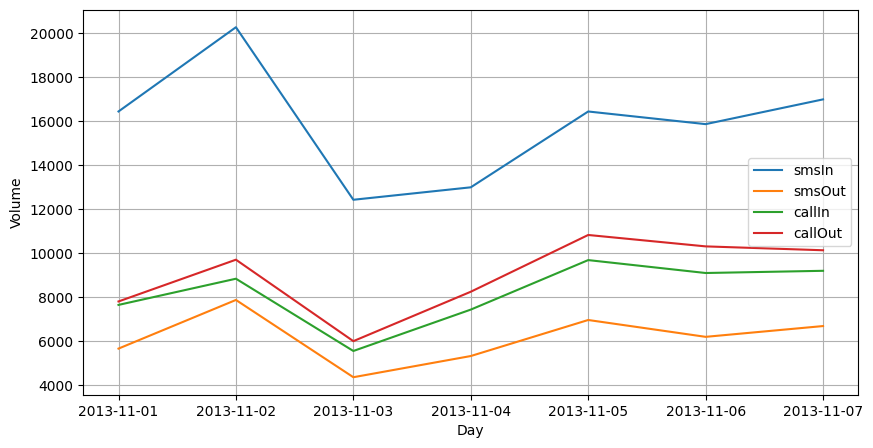

In [32]:
fig, ax = plt.subplots(figsize=(10, 5))

for column in data2_5161_Activity_day.columns:
    data2_5161_Activity_day[column].plot(ax=ax, label=column)

ax.grid()
ax.set_xlabel("Day")
ax.set_ylabel("Volume")
ax.legend()

plt.show()


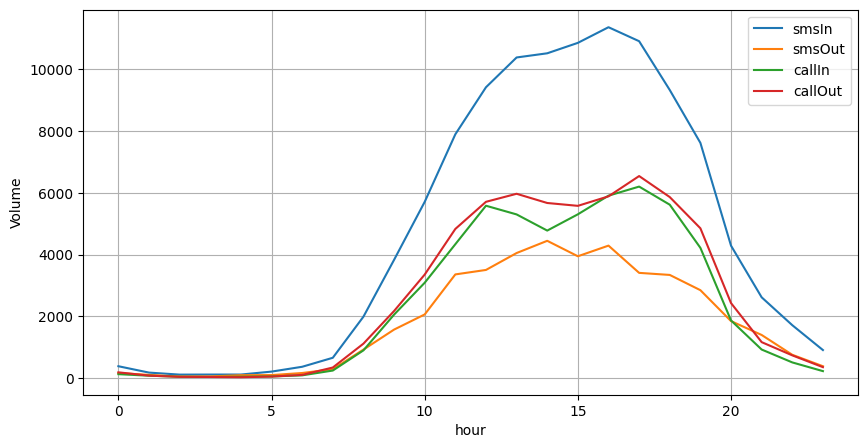

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

for column in data_5161_Activity_hour.columns:
    data_5161_Activity_hour[column].plot(ax=ax, label=column)

ax.grid()
ax.set_xlabel("hour")
ax.set_ylabel("Volume")
ax.legend()

plt.show()


### Geographical visualization of 10000 grids from the geojson file

In [7]:
import geopandas as gpd
import folium

# Read the GeoJSON file into a GeoDataFrame
milan = gpd.read_file('C:\\Users\\a.abdallah\\Downloads\\milano-grid.geojson')

# Create a map centered on Milan

# Create a map centered on Milan
m = folium.Map(location=[45.4642, 9.1900], zoom_start=12)

# Add the GeoDataFrame as a GeoJSON layer, with popup information for each cellId
folium.GeoJson(milan, name='geojson', tooltip=folium.features.GeoJsonTooltip(fields=['cellId'], labels=True, sticky=False)).add_to(m)

# Add layer control to the map
folium.LayerControl().add_to(m)

# Display the map
m


### Fetch the top 10 grids from the sorted grids and display them

In [34]:

SMS_by_grid = group_ActivityTotal_by_grid[['SMS_Total']].sort_values(by = 'SMS_Total' , ascending = False)
CALL_by_grid = group_ActivityTotal_by_grid[['CALL_Total']].sort_values(by = 'CALL_Total' , ascending = False)
INTERNET_by_grid = group_ActivityTotal_by_grid[['internet']].sort_values(by = 'internet' , ascending = False)

SMS_by_grid

SMS_Total
gridID               
5059    188800.334442
5161    154553.655954
6064    142061.943190
5061    138377.177504
5159    130823.665091
...               ...
1207        65.220136
112         61.556434
2801        24.376618
5239         0.000000
5339         0.000000

[10000 rows x 1 columns]

### top 10 volume for SMS,CALL and Internet activity and its gridID

In [35]:

top10 = pd.DataFrame()

top10['sms'] = SMS_by_grid[:10].index.values
top10['call'] = CALL_by_grid[:10].index.values
top10['internet'] = INTERNET_by_grid[:10].index.values
top10

sms  call  internet
0  5059  5059      5161
1  5161  6064      5059
2  6064  5161      5259
3  5061  5159      5061
4  5159  5259      5258
5  5262  6072      4459
6  5259  5061      6064
7  6165  6165      5159
8  5162  5262      5758
9  5163  6058      4856

### Mapping top Grids with real geographic locations

In [10]:
import geopandas as gpd
import geojsonio as gj

#reading file geojson
milan = gpd.read_file('C:\\Users\\a.abdallah\\Downloads\\milano-grid.geojson')

#get unique values across all the columns in dataframe top10
topgrids = pd.unique(top10.values.ravel())

#New browser opens with the top 10 grids
topGridgeojson = milan.loc[milan['cellId'].isin(topgrids)]
topGridgeojson = topGridgeojson.to_json()
_ = gj.display(topGridgeojson)

![title](images/TopGrids.png)

### group the activity by grid , day and hour

In [37]:
group_Activity_by_grid_by_day_by_hour = group_by(data,['gridID','Date','hour'],{'countryCode'})

 #Group data by gridID and Time

group_Activity_by_grid_by_day_by_hour

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\858627787.py:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = data_name.groupby(column).sum()


smsIn    smsOut     callIn    callOut    internet
gridID Date       hour                                                       
1      2013-11-01 0      2.084285  1.104749   0.591930   0.429290   57.799009
                  1      1.163624  0.770031   0.190564   0.194139   44.046899
                  2      0.415579  0.300391   0.027925   0.135964   41.207149
                  3      1.152067  0.895724   0.001787   0.026137   33.022070
                  4      0.354453  0.511192   0.005362   0.026137   31.376930
...                           ...       ...        ...        ...         ...
10000  2013-11-07 19    13.661210  7.526233  11.394525  13.302567  160.847694
                  20    10.930428  3.721888   8.434177   9.673581  170.171584
                  21    10.459571  5.999650   5.371544   5.481134  168.641915
                  22     9.440923  7.578513   1.780944   3.041064  142.807433
                  23     4.912718  2.929960   2.726909   0.938437  135.723164

[1679994 rows x 5 columns]

### List contains the day 

In [38]:
unique_dates = group_Activity_by_grid_by_day_by_hour.index.get_level_values('Date').unique().tolist()
unique_dates
#unique_dates = group_Activity_by_grid_by_day_by_hour['Date'].unique().tolist()


[datetime.date(2013, 11, 1),
 datetime.date(2013, 11, 2),
 datetime.date(2013, 11, 3),
 datetime.date(2013, 11, 4),
 datetime.date(2013, 11, 5),
 datetime.date(2013, 11, 6),
 datetime.date(2013, 11, 7)]

### Plot the activity of smsin , smsout, callin, callout in gridid = 5059 on each day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


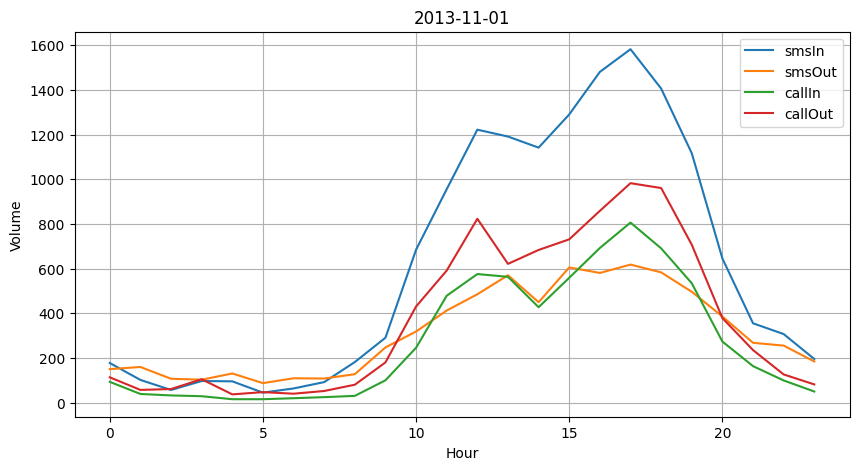

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


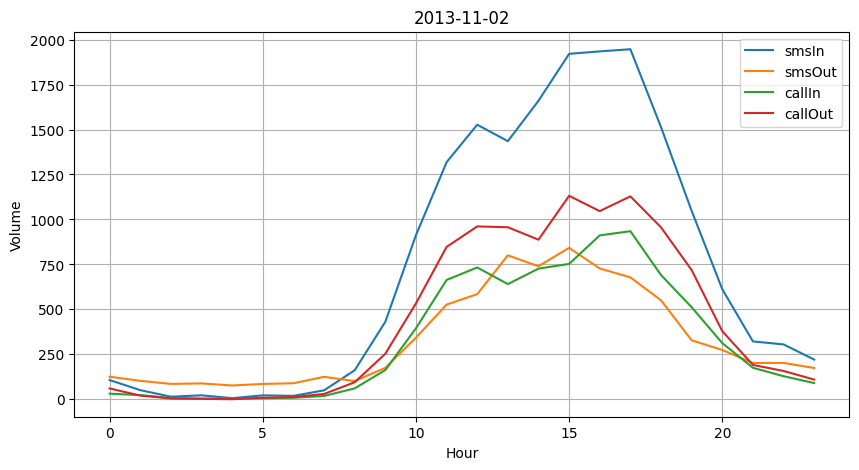

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


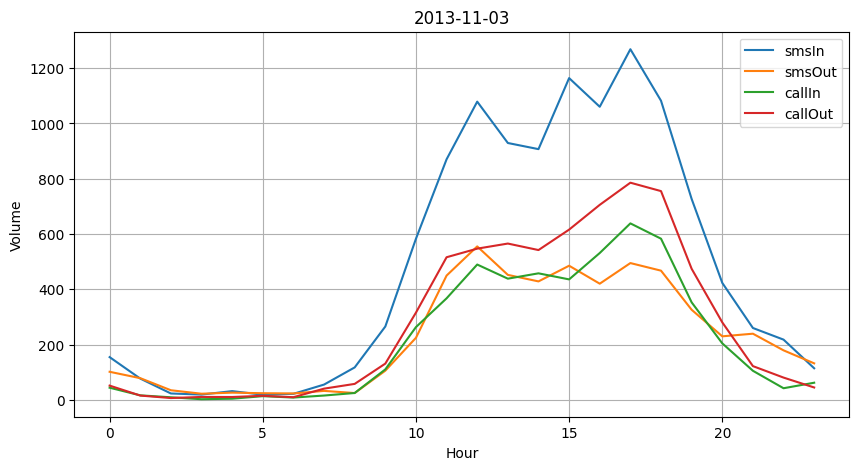

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


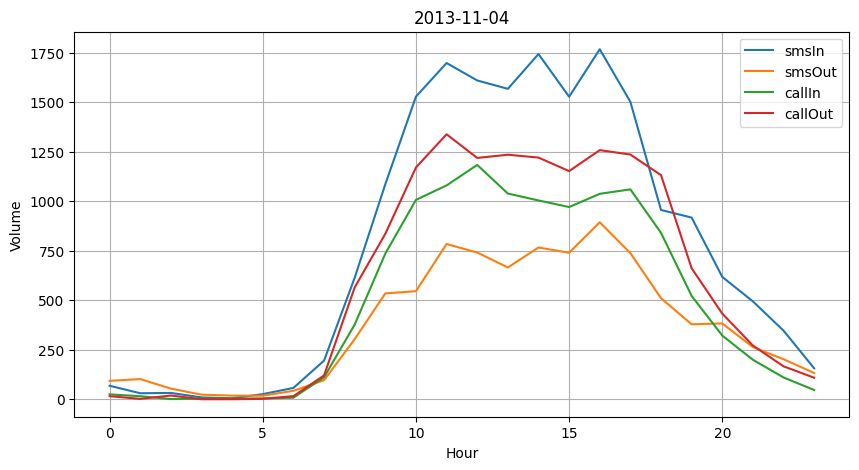

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


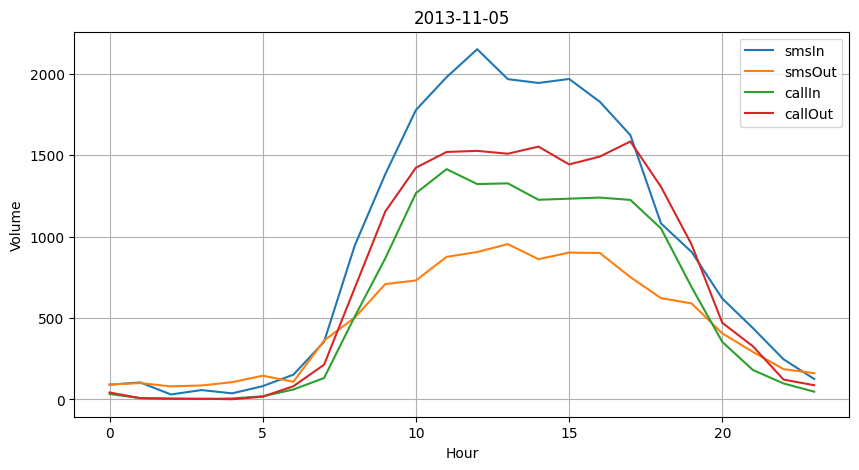

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


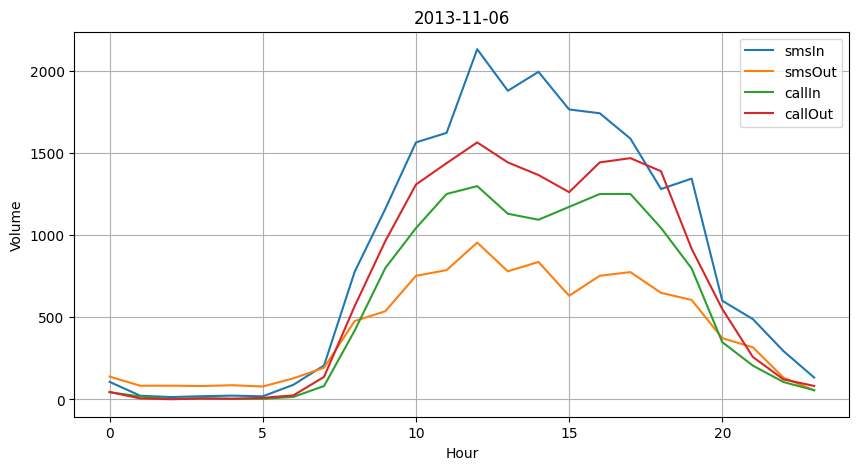

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\1683590287.py:5: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]


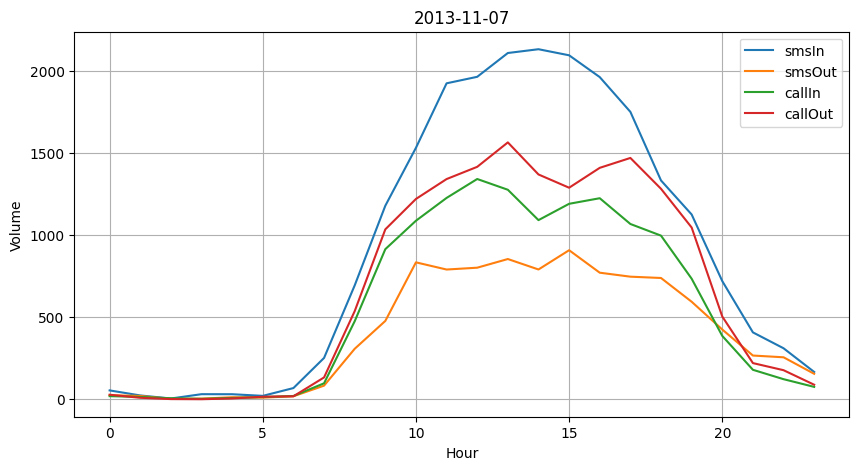

In [39]:
#2013-11-01  is being interpreted as a column name , which does not exist in your group_by_grid_by_day_by_hour , 
# so to fixe it i can use  pd.Timestamp to convert the string '2013-11-01' to a pandas Timestamp object:

for date in unique_dates:
    _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059,pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    fig, ax = plt.subplots(figsize=(10, 5))
    for column in _5059.columns:
        _5059[column].plot(ax=ax, label=column)
   
    ax.grid()
    
    ax.set_title(date)
    ax.set_xlabel("Hour")
    ax.set_ylabel("Volume")
    ax.legend()

    plt.show()
    



C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\69712215.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\69712215.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\69712215.py:12: FutureWarning: Comparison of Timestamp with datetime.date is de

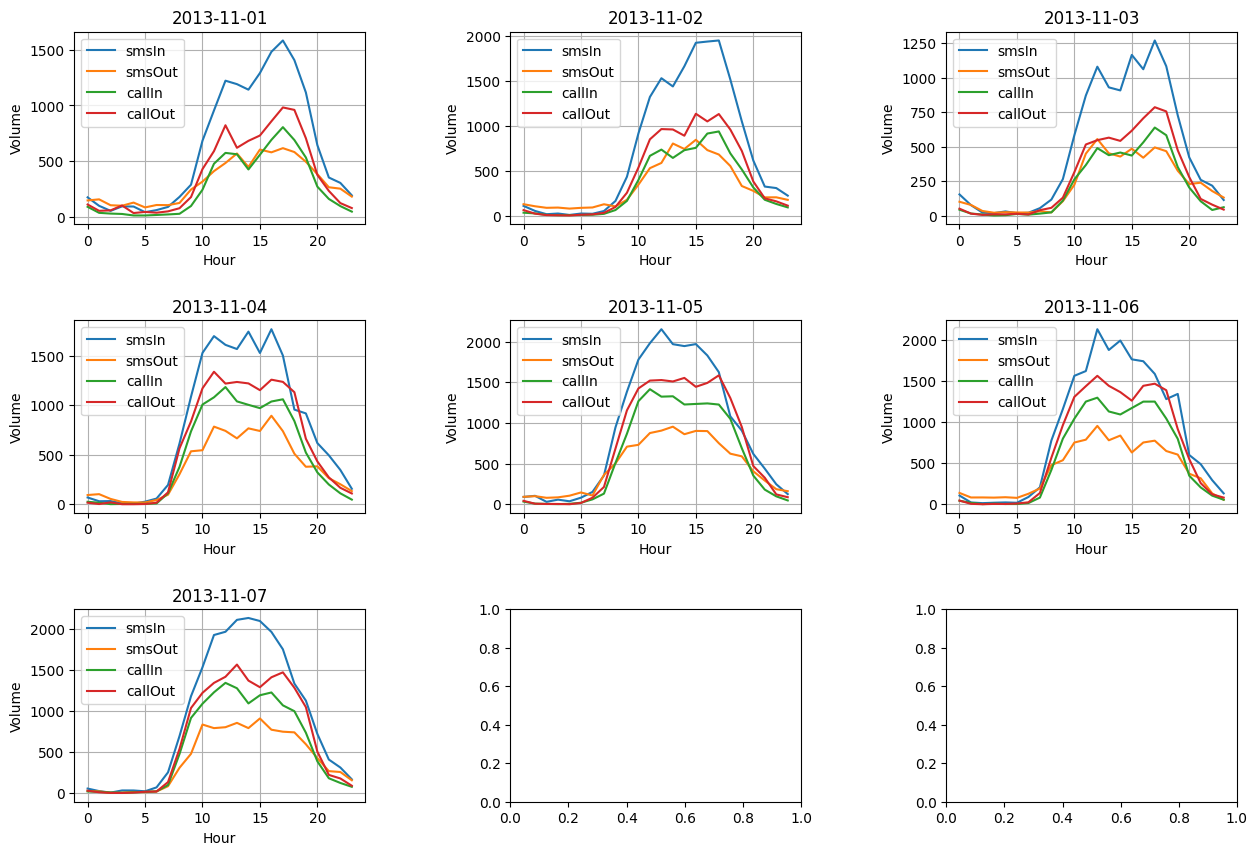

In [40]:

# Define number of rows and columns for subplot grid
nrows = 3
ncols = 3

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Loop over unique dates and plot data for each date
for i, date in enumerate(unique_dates):
    
    # Get data for specific grid and date
    _5059 = group_Activity_by_grid_by_day_by_hour.loc[5059, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    
    # Determine row and column index for subplot
    row = i // ncols
    col = i % ncols
    
    for column in _5059.columns:
    # Select subplot and plot data
        ax[row, col].plot(_5059[column], label=column)
      
        
    ax[row, col].grid()
    ax[row, col].set_xlabel("Hour")
    ax[row, col].set_ylabel("Volume")
    ax[row, col].set_title(date)
    ax[row, col].legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show plot
plt.show()



### Plot the activity of smsin , smsout, callin, callout in gridid = 5163 on each day

C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\145361101.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5163 = group_Activity_by_grid_by_day_by_hour.loc[5161, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\145361101.py:12: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  _5163 = group_Activity_by_grid_by_day_by_hour.loc[5161, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
C:\Users\a.abdallah\AppData\Local\Temp\ipykernel_15744\145361101.py:12: FutureWarning: Comparison of Timestamp with datetime.date is

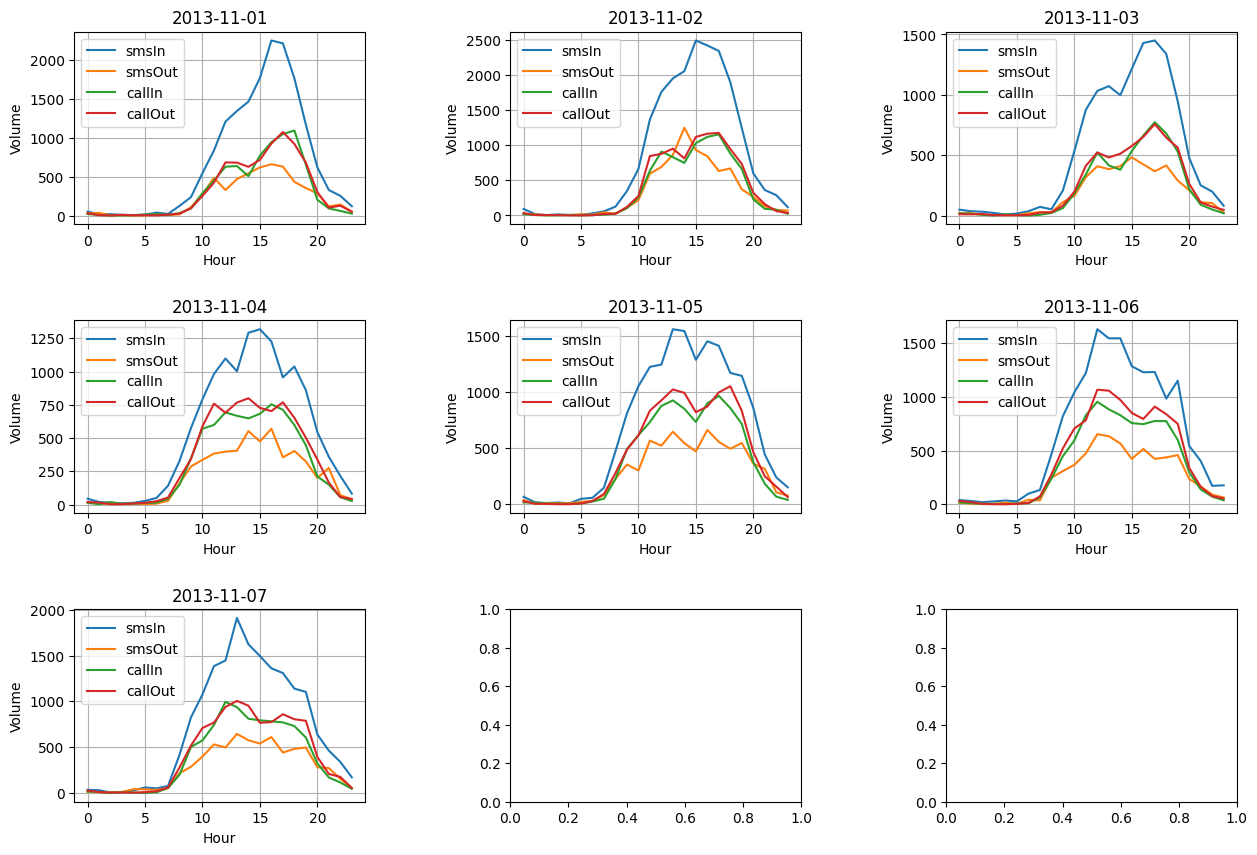

In [41]:

# Define number of rows and columns for subplot grid
nrows = 3
ncols = 3

# Create subplot grid
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10))

# Loop over unique dates and plot data for each date
for i, date in enumerate(unique_dates[:nrows*ncols]):
    
    # Get data for specific grid and date
    _5163 = group_Activity_by_grid_by_day_by_hour.loc[5161, pd.Timestamp(date)][['smsIn','smsOut','callIn','callOut']]
    
    # Determine row and column index for subplot
    row = i // ncols
    col = i % ncols
    
    
        
    for column in _5163.columns:
    # Select subplot and plot data
        ax[row, col].plot(_5163[column], label=column)
    
    ax[row, col].grid()
    ax[row, col].set_xlabel("Hour")
    ax[row, col].set_ylabel("Volume")
    ax[row, col].set_title(date)
    ax[row, col].legend()

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

# Show plot
plt.show()
